In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import Point, LineString
import pooch
import folium

shapefile = pooch.retrieve("https://www2.census.gov/geo/tiger/TIGER2020/ROADS/tl_2020_49035_roads.zip", None)

slc_roads = gpd.read_file("zip://" + shapefile)

display(slc_roads)
print(slc_roads.columns)






,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110550701533,S 730 Exd,M,S1400,"LINESTRING (-111.87053 40.57269, -111.87075 40..."
1,1105036105473,S Valley Water Acc,M,S1640,"LINESTRING (-111.92379 40.6153, -111.92356 40...."
2,1105036105480,S Valley Water Acc,M,S1640,"LINESTRING (-111.92685 40.61516, -111.92668 40..."
3,1102381643575,S Valley Water Acc,M,S1640,"LINESTRING (-111.92217 40.61596, -111.92219 40..."
4,1102678003738,S Valley Water Acc,M,S1640,"LINESTRING (-111.92317 40.61631, -111.92318 40..."
...,...,...,...,...,...
36974,1106081937048,None,None,S1400,"LINESTRING (-111.85463 40.68865, -111.85463 40..."
36975,110550721641,Quail Run Cir,M,S1400,"LINESTRING (-111.82248 40.58104, -111.82253 40..."
36976,110550725567,Olympus Oaks Ln,M,S1400,"LINESTRING (-111.80924 40.68699, -111.80925 40..."
36977,1103718673440,Monte Cristo Ct,M,S1400,"LINESTRING (-111.87698 40.68962, -111.87751 40..."


Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC', 'geometry'], dtype='object')


In [6]:
# creating a graph from the shapefile
graph = nx.Graph()
for idx, row in slc_roads.iterrows():
    geom = row['geometry']
    road_name = row['FULLNAME']
    road_type = row['RTTYP'] # Route Type Code describes type of road

    def calculate_distance(coord1, coord2):
        return LineString([coord1, coord2]).length

    if geom.geom_type == 'LineString':
        coords = list(geom.coords)
        for i in range(len(coords) - 1):
            start_node = coords[i]
            end_node = coords[i + 1]
            weight = calculate_distance(start_node, end_node)
            graph.add_edge(
                start_node,
                end_node,
                weight=weight,
                name=road_name,
                road_type=road_type
            )
    elif geom.geom_type == 'MultiLineString':
        for line in geom.geoms:
            coords = list(line.coords)
            for i in range(len(coords) - 1):
                start_node = coords[i]
                end_node = coords[i + 1]
                weight = calculate_distance(start_node, end_node)
                graph.add_edge(
                    start_node,
                    end_node,
                    weight=weight,
                    name=road_name,
                    road_type=road_type
                )


KeyboardInterrupt: 

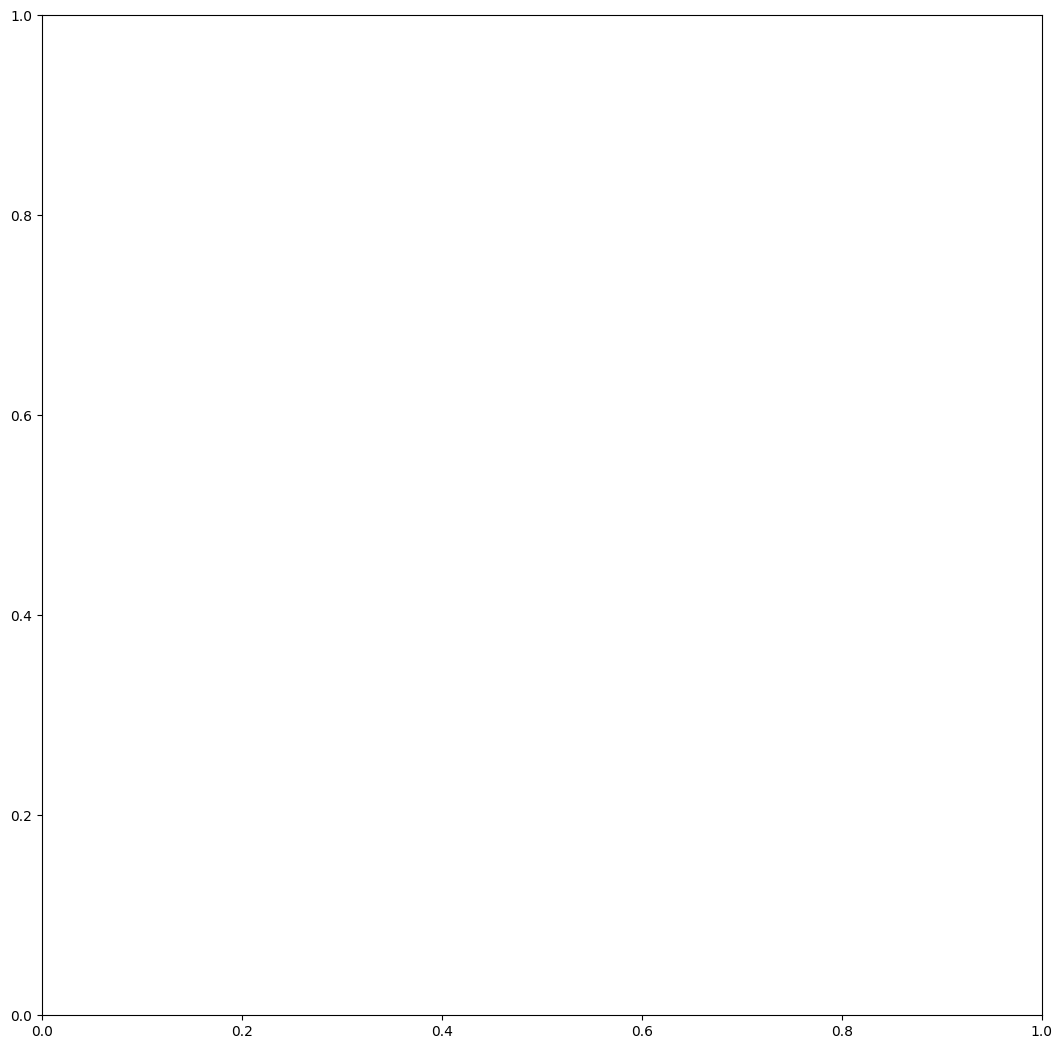